In [1]:
import warnings
warnings.simplefilter(action = 'ignore')
import gym
import random
from IPython.display import clear_output

In [2]:
# Create an instance of the Mountain Car environment
env = gym.make('MountainCar-v0',render_mode='human')



# Reset the environment and get the initial observation
env.reset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


array([-0.53835696,  0.        ], dtype=float32)

In [3]:
# Print the state space and action space of the environment

print('State space:', env.observation_space)
print('Action space:', env.action_space)

State space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


In [4]:
# Print the minimum possible values for each variable in the state space

print(env.observation_space.low)

[-1.2  -0.07]


Display the minimum possible values for each variable in the environment's state space.

In [5]:
# Print the maximum possible values for each variable in the state space
print(env.observation_space.high)

[0.6  0.07]


In [7]:
#prints the initial state of an environment using the reset() function.

print(env.reset())

[-0.54615366  0.        ]


In [8]:
# Take an action in the environment and observe the results
print(env.step(2))

(array([-0.54498464,  0.00116903], dtype=float32), -1.0, False, {})


In [9]:
# Import necessary libraries: NumPy, Gym, and Matplotlib.

import numpy as np
import gym
import matplotlib.pyplot as plt

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1,
                          size = (num_states[0], num_states[1],
                                  env.action_space.n))

    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []

    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes

    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()

        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        while done != True:
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()

            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)

            # Get next state and reward
            state2, reward, done, info = env.step(action)

            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)

            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward

            # Adjust Q value for current state
            else:
                delta = learning*(reward +
                                 discount*np.max(Q[state2_adj[0],
                                                   state2_adj[1]]) -
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta

            # Update variables
            tot_reward += reward
            state_adj = state2_adj

        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction

        # Track rewards
        reward_list.append(tot_reward)

        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

     #Finally, the function returns the list of average rewards per episode.


    return ave_reward_list


## Average reward per 1000 episodes



/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Text(0.5, 1.0, 'Average Reward vs Episodes')

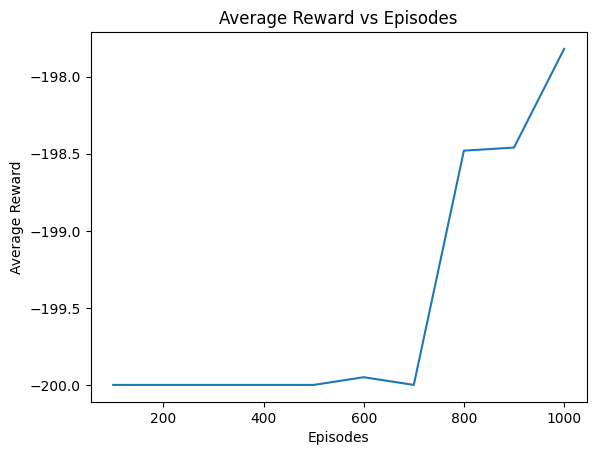

In [10]:
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 1000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## Average reward per 5000 episodes with a discount factor of 0.8


Text(0.5, 1.0, 'Average Reward vs Episodes')

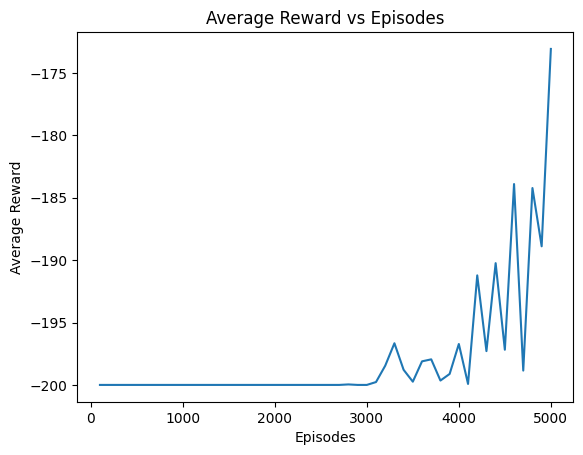

In [11]:
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## Average reward per 5000 episodes with a discount factor of 0.5


Text(0.5, 1.0, 'Average Reward vs Episodes')

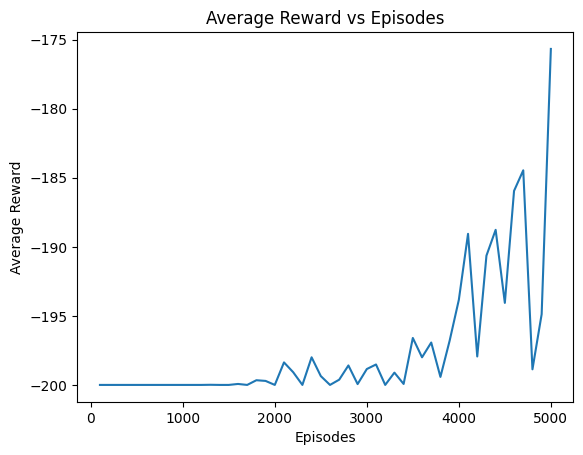

In [12]:
rewards = QLearning(env, 0.2, 0.9, 0.5, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## Average reward per 5000 episodes with a discount factor of 0.8 and epsilon 0.5


Text(0.5, 1.0, 'Average Reward vs Episodes')

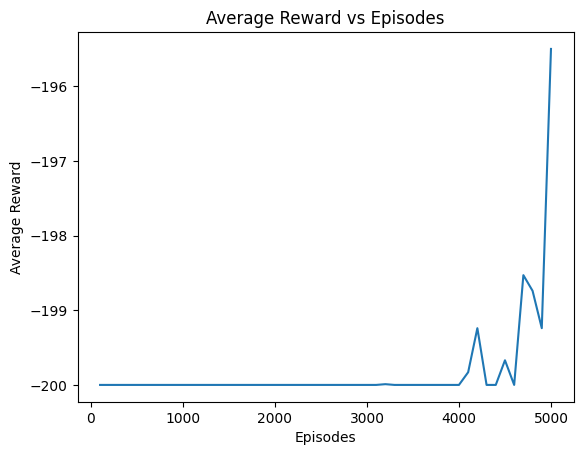

In [13]:
rewards = QLearning(env, 0.2, 0.5, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## The average reward over 5000 episodes is calculated with a learning rate of 0.2, a discount factor of 0.8, and an epsilon 0.1


Text(0.5, 1.0, 'Average Reward vs Episodes')

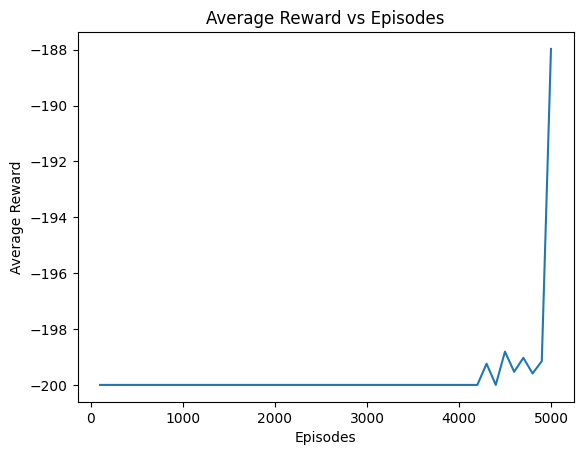

In [14]:
rewards = QLearning(env, 0.2, 0.1, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')